In [11]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl


In [12]:
''' high vegetation = 21-14
    zero vegetation = 15_23
'''

' high vegetation = 21-14\n    zero vegetation = 15_23\n'

In [13]:
sub_image1 = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\sub_images\\RUH_2018-12-15_11_11.npy"
sub_image2 = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project_Doc\\Docs\\sub_images\\RUH_2023-12-19_11_11.npy"

sub_image1 = np.load(sub_image1)
sub_image2 = np.load(sub_image2)

In [14]:
# Setting the threshold
threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
change_detection = np.where((sub_image1 > threshold) | (sub_image2 > threshold), sub_image2 - sub_image1, 0)

change_detection

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.02491987,  0.09308566,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02491987,  0.01176821,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.15913951, -0.20632997, -0.08304943, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

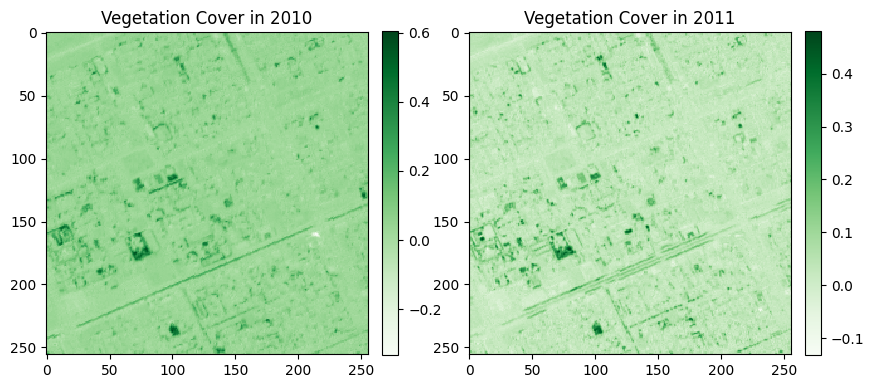

In [15]:
# Plotting the vegetation cover for 2010 and 2011 side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Vegetation cover for 2010
cax_2010 = axs[0].imshow(sub_image1, cmap='Greens', interpolation='nearest')
fig.colorbar(cax_2010, ax=axs[0], fraction=0.046, pad=0.04)
axs[0].set_title('Vegetation Cover in 2010')


# Vegetation cover for 2011
cax_2011 = axs[1].imshow(sub_image2, cmap='Greens', interpolation='nearest')
fig.colorbar(cax_2011, ax=axs[1], fraction=0.046, pad=0.04)
axs[1].set_title('Vegetation Cover in 2011')


plt.show()


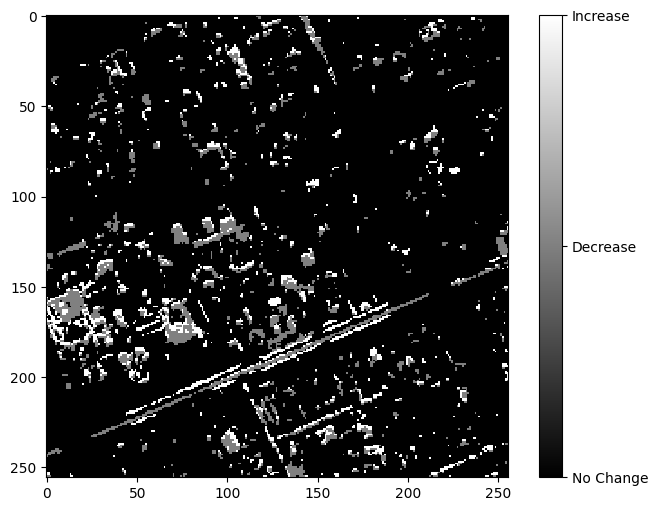

In [16]:
# Initializing an array for categorized changes
categorized_changes = np.zeros_like(change_detection)
# Increase in vegetation cover (positive change)
categorized_changes[change_detection > 0] = 1  # White

# Decrease in vegetation cover (negative change)
categorized_changes[change_detection < 0] = 0.5  # Gray

# Plotting the categorized changes
plt.figure(figsize=(8, 6))
plt.imshow(categorized_changes, cmap='gray', interpolation='nearest')
plt.colorbar( ticks=[0, 0.5, 1], format=lambda x, _: {0: 'No Change', 0.5: 'Decrease', 1: 'Increase'}.get(x, ''))
plt.show()

In [35]:
from matplotlib.colors import ListedColormap

def categorize_change(value):
    if 0 < value <= 0.25:
        return 1
    elif 0.25 < value <= 0.5:
        return 2
    elif 0.5 < value <= 0.75:
        return 3
    elif 0.75 < value <= 1:
        return 4
    elif -0.25 <= value < 0:
        return -1
    elif -0.5 <= value < -0.25:
        return -2
    elif -0.75 <= value < -0.5:
        return -3
    elif -1 <= value < -0.75:
        return -4
    else:
        return 0
    
# Adjusted color mapping to include darker shades for higher absolute values
colors = ['#FF0505', '#FA6A6A', '#FFC8C8', 'black', '#9AFFB4', '#40BA45', '#183E0C']  # Dark red, red, orange, black, light green, green, dark green
cmap = ListedColormap(colors)
bounds = [-4.5, -3.5, -2.5, -1.5, 0.5, 1.5, 2.5, 3.5, 4.5]  # Adjusted to include bounds for all categories
norm = plt.Normalize(min(bounds), max(bounds))

# Assuming sub_image1 and sub_image2 are defined earlier in your code
# Setting the threshold
threshold = 0.111

# Calculating changes where either of the values is greater than the threshold
change_detection = np.where((sub_image1 > threshold) | (sub_image2 > threshold), sub_image2 - sub_image1, 0)

# Vectorizing the categorize_change function to apply it element-wise
categorize_change_vectorized = np.vectorize(categorize_change)

# Applying the categorization to the change_detection array
categorized_changes = categorize_change_vectorized(change_detection)

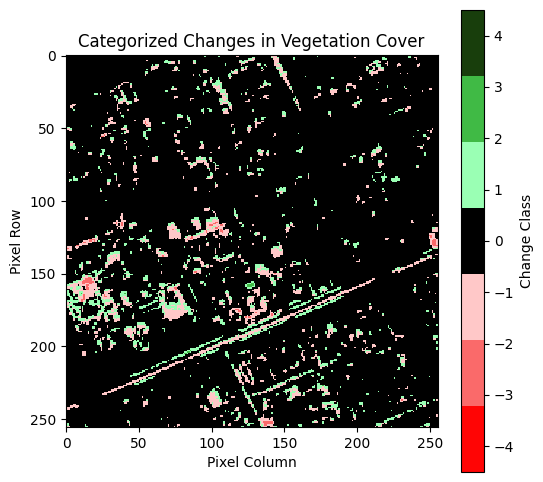

In [36]:
# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(categorized_changes, cmap=cmap, norm=norm, interpolation='nearest')
plt.colorbar(ticks=np.arange(-4, 5), label='Change Class')  # Adjusted tick marks to include all categories
plt.title('Categorized Changes in Vegetation Cover')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.grid(False)
plt.show()

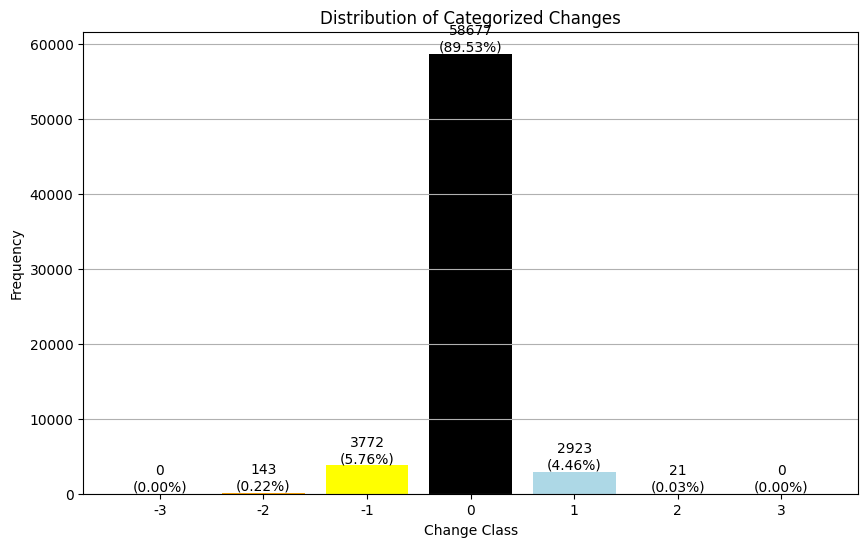

In [34]:
# Calculate the distribution of categorized changes
(unique, counts) = np.unique(categorized_changes, return_counts=True)
frequencies = dict(zip(unique, counts))
total_pixels = np.sum(counts)

# Prepare the data for plotting
categories = ['-3', '-2', '-1', '0', '1', '2', '3']
counts = [frequencies.get(category, 0) for category in range(-3, 4)]

# Plotting the distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['red', 'orange', 'yellow', 'black', 'lightblue', 'lightgreen', 'darkgreen'])
plt.xlabel('Change Class')
plt.ylabel('Frequency')
plt.title('Distribution of Categorized Changes')
plt.grid(axis='y')

# Adding the count and percentage above each bar
for bar in bars:
    yval = bar.get_height()
    percentage = f'{yval / total_pixels * 100:.2f}%'
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval}\n({percentage})', ha='center', va='bottom')

# Show the plot
plt.show()